# Reproducibility, reliability, validity
## NSCI 801 - Quantitative Neuroscience

Gunnar Blohm

### Outline
* statistical considerations
    * multiple comparisons
    * exploratory analyses vs hypothesis testing
* Open Science
    * general steps toward transparency
    * pre-registration / registered report
* Open science vs. patents

### Multiple comparisons
In [2009, Bennett et al.](https://teenspecies.github.io/pdfs/NeuralCorrelates.pdf) studies the brain of a salmon using fMRI and found significant activation despite the salmon being dead... (IgNobel Prize 2012)

Why did they find this?

They imaged 140 volumes (samples) of the brain and ran a standard preprocessing pipeline, including spatial realignment, co-registration of functional and anatomical volumes, and 8mm full-width at half maximum (FWHM) Gaussian smoothing. 

They computed voxel-wise statistics. 

<img style="float: center; width:750px;" src="stuff/salmon.png">

This is a prime example of what's known as the **multiple comparison problem**!

“the problem that occurs when one considers a set of statistical inferences simultaneously or infers a subset of parameters selected based on the observed values” (Wikipedia)
* problem that arises when implementing a large number of statistical tests in the same experiment
* the more tests we do, the higher probability of obtaining, at least, one test with statistical significance

### Probability(false positive) = f(number comparisons)
If you repeat a statistical test over and over again, the false positive ($FP$) rate ($P$) evolves as follows:
$$P(FP)=1-(1-\alpha)^N$$
* $\alpha$ is the confidence level for each individual test (e.g. 0.05)
* $N$ is the number of comparisons

Let's see how this works...

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('dark_background')

Let's create some random data...

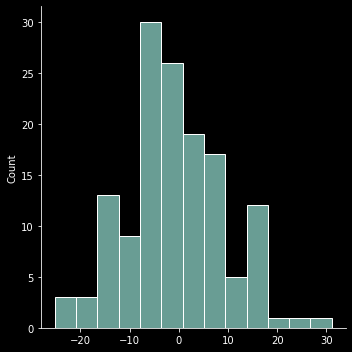

In [10]:
rvs = stats.norm.rvs(loc=0, scale=10, size=140)
sns.displot(rvs)

Now let's run a t-test to see if it's different from 0

In [11]:
statistic, pvalue = stats.ttest_1samp(rvs, 0)
print(pvalue)

0.28343500438551184


Now let's do this many times for different samples, e.g. different voxels of our salmon...

In [22]:
def t_test_function(alp, N):
    """computes t-test statistics on N random samples and returns number of significant tests"""
    
    counter = 0
    for i in range(N):
        rvs = stats.norm.rvs(loc=0, scale=10, size=1000)
        statistic, pvalue = stats.ttest_1samp(rvs, 0)
        if pvalue <= alp:
            counter = counter + 1
        
    print(counter)
    return counter

N = 1000
counter = t_test_function(0.05, N)
print("The false positve rate was", counter/N*100, "%")

53
The false positve rate was 5.3 %


Well, we wanted a $\alpha=0.05$, so what's the problem?

The problem is that we have hugely increased the likelihood of finding something significant by chance! (**p-hacking**)

Take the above example:
* running 100 independent tests with $\alpha=0.05$ resulted in a few positives
* well, that's good right? Now we can see if there is a story here we can publish...
    * dead salmon!
* remember, our data was just noise!!! There was NO signal!

This is why we have corrections for multiple comparisons that adjust the p-value so that the **overall chance** to find a false positive stays at $\alpha$!

Why does this matter?

### Exploratory analyses vs hypothesis testing

Why do we distinguish between them?

<img style="float: center; width:750px;" src="stuff/ExploreConfirm.png">

But in science, confirmatory analyses that are hypothesis-driven are often much more valued. 

There is a temptation to frame *exploratory* analyses and *confirmatory*...

**This leads to disaster!!!**
* science is not solid
* replication crisis (psychology, social science, medicine, marketing, economics, sports science, etc, etc...)
* shaken trust in science

<img style="float: center; width:750px;" src="stuff/crisis.jpeg">

([Baker 2016](https://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970))

### Quick excursion: survivorship bias
"Survivorship bias or survival bias is the logical error of concentrating on the people or things that made it past some selection process and overlooking those that did not, typically because of their lack of visibility." (Wikipedia)

<img style="float: center; width:750px;" src="stuff/SurvivorshipBias.png">

**How does survivorship bias affect neuroscience?**

Think about it...

E.g.
* people select neurons to analyze
* profs say it's absolutely achievable to become a prof

Just keep it in mind...

### Open science - transparency
Open science can hugely help increasing transparency in many different ways so that findings and data can be evaluated for what they are:
* publish data acquisition protocol and code: increases data reproducibility & credibility
* publish data: data get second, third, etc... lives
* publish data processing / analyses: increases reproducibility of results
* publish figures code and stats: increases reproducibility and credibility of conclusions
* pre-register hypotheses and analyses: ensures *confirmatory* analyses are not *exploratory* (HARKing)

For more info, see NSCI800 lectures about Open Science: [OS1](http://www.compneurosci.com/NSCI800/OpenScienceI.pdf), [OS2](http://www.compneurosci.com/NSCI800/OpenScienceII.pdf)

### Pre-registration / registered reports
<img style="float:right; width:500px;" src="stuff/RR.png">

* IPA guarantees publication
    * If original methods are followed
    * Main conclusions need to come from originally proposed analyses
* Does not prevent exploratory analyses
    * Need to be labeled as such
    
[https://Cos.io/rr](https://Cos.io/rr)

Please follow **Stage 1** instructions of [the registered report intrustions from eNeuro](https://www.eneuro.org/sites/default/files/additional_assets/pdf/eNeuro%20Registered%20Reports%20Author%20Guidelines.pdf) for the course evaluation...

Questions???

### Open science vs. patents
The goal of Open Science is to share all aspects of research with the public!
* because knowledge should be freely available
* because the public paid for the science to happen in the first place

However, this prevents from patenting scientific results! 
* this is good for science, because patents obstruct research
* prevents full privitazation of research: companies driving research is biased by private interest

Turns out open science is good for business!
* more people contribute
* wider adoption
    * e.g. Github = Microsoft, Android = Google, etc
* better for society
    * e.g.  nonprofit pharma

**Why are patents still a thing?**

Well, some people think it's an outdated and morally corrupt concept. 
* goal: maximum profit
* enabler: capitalism
* victims: general public

Think about it and decide for yourself what to do with your research!!!

### THANK YOU!!!
<img style="float:center; width:750px;" src="stuff/empower.jpg">